In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import ta
import requests

from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.dates import DateFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [8]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'ADBE', 'CRM',
    'CSCO', 'INTC', 'AMD', 'QCOM', 'ORCL', 'TXN', 'INTU', 'AMAT', 'MU', 'NOW',
    'SHOP', 'PANW', 'SNOW', 'ZM', 'PLTR', 'UBER', 'LYFT', 'DOCU', 'FSLY', 'TWLO'
]


In [24]:
import pandas as pd
import requests
import time
from tqdm import tqdm
import ta

# Assuming API_KEY is defined
API_KEY = "25SKFAOGSF41JCEY"

def fetch_alpha_vantage_stock(ticker, interval='1min', outputsize='full'):
    url = f'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_INTRADAY',
        'symbol': ticker,
        'interval': interval,
        'outputsize': outputsize,
        'apikey': API_KEY
    }

    r = requests.get(url, params=params)
    data = r.json()

    # Check for error messages or empty data
    if "Error Message" in data or "Note" in data:
        print(f"Error for {ticker}: {data.get('Error Message', data.get('Note'))}")
        return None
    
    key = f'Time Series ({interval})'
    if key not in data:
        print(f"No data for {ticker}")
        print(f"Full response: {data}")
        return None

    df = pd.DataFrame(data[key]).T
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.astype(float)
    df['Ticker'] = ticker

    # Compute additional columns
    df['Returns'] = df['Close'].pct_change()
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['EMA_2'] = df['Close'].ewm(span=2, adjust=False).mean()

    rsi = ta.momentum.RSIIndicator(close=df['Close'])
    df['RSI'] = rsi.rsi()

    macd = ta.trend.MACD(close=df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['MACD_Diff'] = macd.macd_diff()

    bb = ta.volatility.BollingerBands(close=df['Close'])
    df['BB_High'] = bb.bollinger_hband()
    df['BB_Low'] = bb.bollinger_lband()

    df['Volume_EMA'] = df['Volume'].ewm(span=20).mean()
    df['Volatility'] = df['Log_Returns'].rolling(window=60).std()

    df.dropna(inplace=True)
    return df


def fetch_all_alpha_stocks(tickers, output_csv=None):
    all_data = []

    for ticker in tqdm(tickers):
        df = fetch_alpha_vantage_stock(ticker)
        if df is not None:
            all_data.append(df)
        

    combined_df = pd.concat(all_data)
    combined_df.index.names = ['Datetime']
    combined_df = combined_df.sort_index()
    
    # If an output CSV file name is provided, save the data to a CSV
    if output_csv:
        combined_df.to_csv(output_csv)
        print(f"Data saved to {output_csv}")

    return combined_df


# Example usage:
#tickers = ['AAPL', 'MSFT']
df = fetch_all_alpha_stocks(tickers, output_csv='allStock_data.csv')

# This will save the combined dataframe to 'stock_data.csv' locally in the working directory


  3%|▎         | 1/30 [00:00<00:21,  1.34it/s]

No data for AAPL
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


  7%|▋         | 2/30 [00:01<00:19,  1.41it/s]

No data for MSFT
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 10%|█         | 3/30 [00:02<00:19,  1.38it/s]

No data for GOOGL
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 13%|█▎        | 4/30 [00:02<00:14,  1.84it/s]

No data for AMZN
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 17%|█▋        | 5/30 [00:03<00:15,  1.60it/s]

No data for NVDA
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 20%|██        | 6/30 [00:04<00:16,  1.44it/s]

No data for META
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 23%|██▎       | 7/30 [00:04<00:13,  1.74it/s]

No data for TSLA
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 27%|██▋       | 8/30 [00:05<00:16,  1.35it/s]

No data for AVGO
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 30%|███       | 9/30 [00:05<00:12,  1.65it/s]

No data for ADBE
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


 30%|███       | 9/30 [00:06<00:14,  1.50it/s]


KeyboardInterrupt: 

Plotting the data to aurafarm

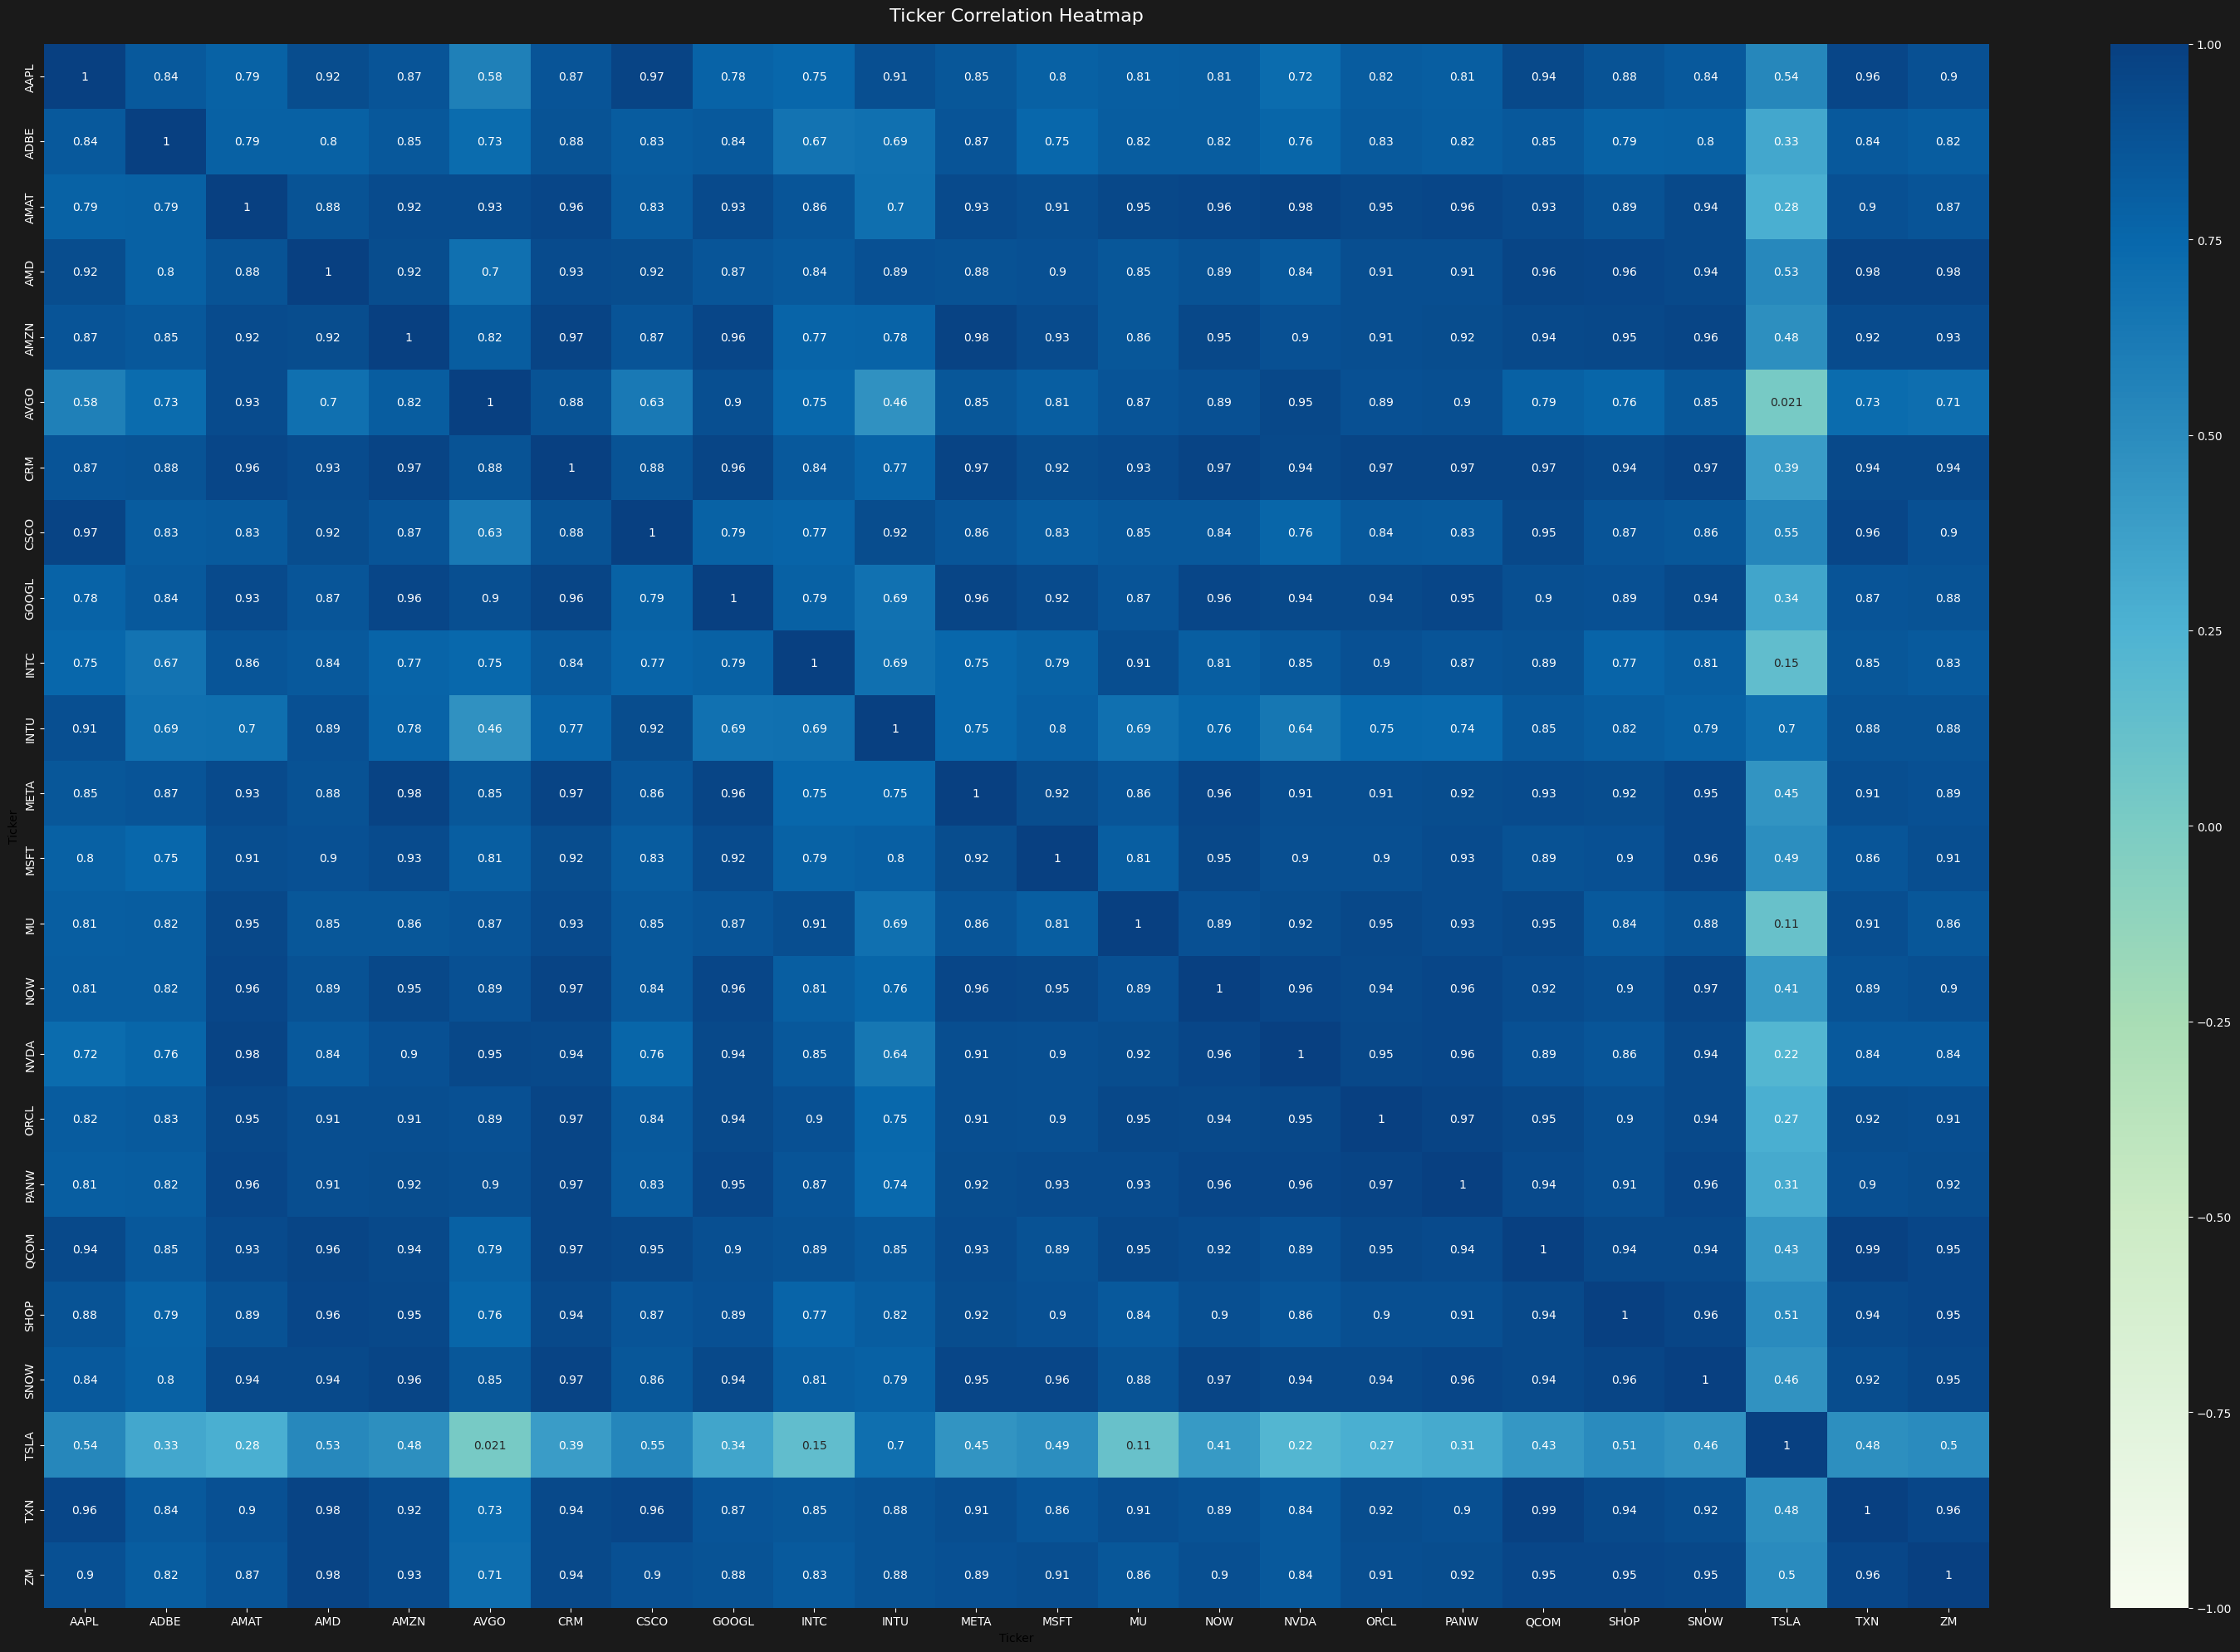

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [21]:
df = pd.read_csv('allStock_data.csv', parse_dates=['Datetime'])


# -- CORRELATION HEATMAP --
def plot_correlation_heatmap(df):
    pivot = df.pivot_table(index='Datetime', columns='Ticker', values='Close')
    corr = pivot.corr()

    fig, ax = plt.subplots(figsize=(30, 20))
    sns.heatmap(corr, annot=True, cmap='GnBu', vmin=-1, vmax=1, center=0)
    ax.set_title('Ticker Correlation Heatmap', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    #return corr

plot_correlation_heatmap(df)


def plot_3d_volatility_interactive(df):
    fig = go.Figure()

    for ticker in df['Ticker'].unique():
        ticker_df = df[df['Ticker'] == ticker].copy()
        ticker_df = ticker_df.sort_index()
        if len(ticker_df) < 2:
            continue  # skip if not enough data

        dates = pd.to_datetime(ticker_df.index).astype(np.int64) // 10**9  # convert datetime to numeric
        fig.add_trace(go.Scatter3d(
            x=dates,
            y=ticker_df['Volatility'],
            z=ticker_df['RSI'],
            mode='lines+markers',
            name=ticker,
            line=dict(width=4),
            marker=dict(size=3)
        ))

    fig.update_layout(
        title='3D Volatility-RSI Timeline',
        scene=dict(
            xaxis_title='DateTime (numeric)',
            yaxis_title='Volatility',
            zaxis_title='RSI',
            camera_eye=dict(x=1.2, y=1.2, z=0.8),
            aspectratio=dict(x=1.5, y=1, z=0.7)
        ),
        legend=dict(x=0.85, y=0.95),
        height=800,
        width=1200
    )

    fig.show()
    
plot_3d_volatility_interactive(df)

In [ ]:
# Dark Mode Setup
rcParams['figure.facecolor'] = '#1a1a1a'
rcParams['axes.facecolor'] = '#2a2a2a'
rcParams['axes.edgecolor'] = 'white'
rcParams['text.color'] = 'white'
rcParams['xtick.color'] = 'white'
rcParams['ytick.color'] = 'white'

# -- 3D VOLATILITY PLOT --
def plot_3d_volatility(df):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')

    for ticker in df['Ticker'].unique():
        ticker_df = df[df['Ticker'] == ticker].copy()
        ticker_df = ticker_df.sort_index()
        if len(ticker_df) < 2:
            continue  # skip if not enough data

        dates = pd.to_datetime(ticker_df.index).astype(np.int64) // 10**9  # numeric for 3D plot
        ax.plot(dates,
                ticker_df['Volatility'],
                ticker_df['RSI'],
                label=ticker,
                linewidth=2)

    ax.set_xlabel('DateTime (numeric)', fontsize=12)
    ax.set_ylabel('Volatility', fontsize=12)
    ax.set_zlabel('RSI', fontsize=12)
    ax.set_title('3D Volatility-RSI Timeline', fontsize=16)
    ax.legend()
    ax.view_init(elev=25, azim=45)
    plt.tight_layout()
    plt.show()


  0%|          | 0/30 [00:00<?, ?it/s]

No data for AAPL
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


  3%|▎         | 1/30 [00:12<06:10, 12.77s/it]

No data for MSFT
Full response: {'Information': 'We have detected your API key as 25SKFAOGSF41JCEY and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


  3%|▎         | 1/30 [00:18<09:08, 18.92s/it]


KeyboardInterrupt: 

In [ ]:
df = fetch_all_alpha_stocks(tickers)

for ticker in df:
    animate_bollinger(ticker, df)

In [ ]:
plot_3d_volatility(df)

In [ ]:
features = ['Close', 'Returns', 'Log_Returns', 'SMA_5', 'EMA_2', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff', 'BB_High', 'BB_Low', 'Volume_EMA', 'Volatility']
df = fetch_all_alpha_stocks(tickers)

def scale_features(df, feature_cols):
    scalers = {}
    
    for ticker in df['Ticker'].unique():
        
        scaler = MinMaxScaler()
        
        idx = df['Ticker'] == ticker
        
        df.loc[idx, feature_cols] = scaler.fit_transform(df.loc[idx, feature_cols])
        
        scalers[ticker] = scaler
        
    return df, scalers



def create_sequences(df, feature_cols, sequence_length=60):
    X = []
    y = []


    for ticker in df['Ticker'].unique():
        
        df_ticker = df[df['Ticker'] == ticker]
        
        data = df_ticker[feature_cols].values
        target = df_ticker['Close'].values  # or next-day close/return etc.
        
        
        for i in range(sequence_length, len(df_ticker)):
            X.append(data[i-sequence_length:i])  # past 60 days
            y.append(target[i])  # predict next close price

    return np.array(X), np.array(y)

# Normalising the data
combined_df, scalers = scale_features(df, features)

# Creating sequences for the LSTM and such
X, y = create_sequences(combined_df, features, sequence_length=60) # 60 candlesticks = 1 Hour


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences